# Redes Convolucionales

**Autor:** Jazna Meza Hidalgo

**Correo Electrónico:** ja.meza@profesor.duoc.cl

**Fecha de Creación:** Mayo de 2025

**Versión:** 1.0  

---

## Descripción

Keras permite crear redes convolucionales para procesar imágenes usando la capa `keras.layers.Conv2D`. Los parámetros para estas capas serán los que se revisarán para capas convlucionales (cantidad de kernels, tamaño de cada kernel, stride, tipo de padding, entre otros). Es posible mezclarla también con capas de pooling como `keras.layers.MaxPool2D` y  las capas densas.

---

## Requisitos de Software

Este notebook fue desarrollado con Python 3.9. A continuación se listan las bibliotecas necesarias:

- tensorflow (2.18.0)

Para verificar la versión instalada ejecutar usando el siguiente comando, usando la librería de la cual quieres saber la versión:

```bash
import tensorflow as tf
print(tf.__version__)
````

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from matplotlib import pyplot as plt
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Input

In [ ]:
(imgs_train, labs_train), (imgs_test, labs_test) = keras.datasets.cifar10.load_data()
print(imgs_train.shape)
print(imgs_test.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step
(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [ ]:
nombres = ['avión', 'auto', 'pájaro', 'gato', 'venado', 'perro', 'rana', 'caballo', 'barco', 'camión']

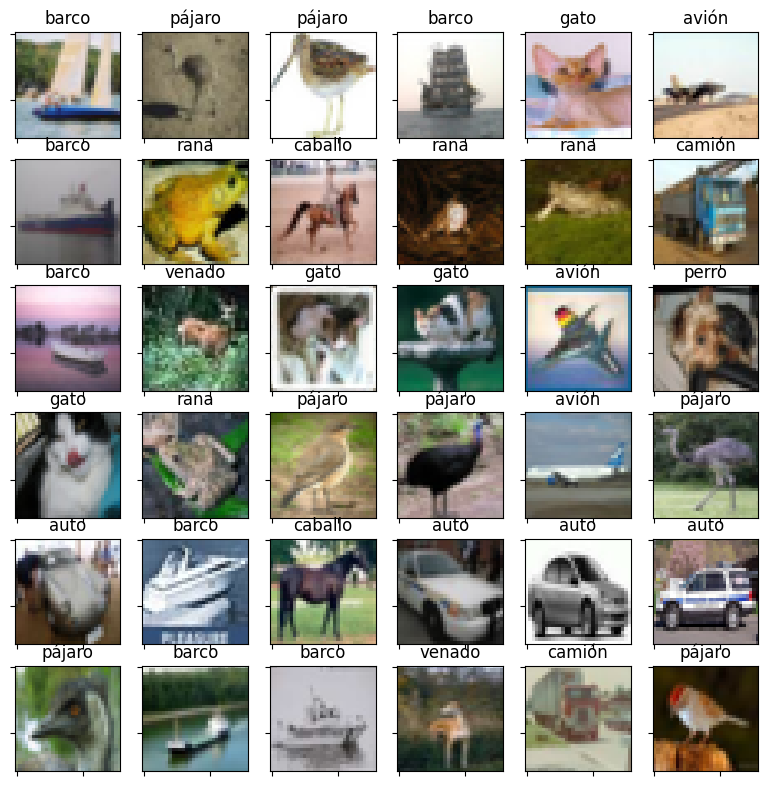

In [ ]:
# Muestra una grilla de ejemplos (al azar) del conjunto de test

h = 6 # alto de la grilla
w = 6 # ancho de la grilla
fig, axs = plt.subplots(h, w, figsize=(1.6*h,1.6*w))
for i in range(h):
  for j in range(w):
    ex = np.random.randint(len(imgs_test))
    axs[i,j].set_title(nombres[labs_test[ex][0]])
    axs[i,j].grid(False)
    axs[i,j].set_xticklabels([])
    axs[i,j].set_yticklabels([])
    axs[i,j].imshow(imgs_test[ex])

In [ ]:
# Normaliza los datos de imágenes pero no se cambia la forma

X_train = imgs_train
X_train = X_train / 255

X_test = imgs_test
X_test = X_test / 255

print(X_train.shape, X_test.shape)

# Las etiquetas si deden ser llevadas a un vector one-hot

Y_train = keras.utils.to_categorical(labs_train, 10)
Y_test = keras.utils.to_categorical(labs_test, 10)

print(Y_train.shape, Y_test.shape)


(50000, 32, 32, 3) (10000, 32, 32, 3)
(50000, 10) (10000, 10)


## Importando capas

Ahora se comienzan a usar más tipos de capas distintas. Las capas que serán usadas inicialmente serán `Dense`, `Conv2D`, `MaxPool2D` y `Flatten` (esta última se usa para cambiar la forma de los datos de manera de que puedan ser entregados a una red feed-forward).

##  Nuestra primera red convolucional

El siguiente código  crea una red con la siguiente arquitectura

**Convolucional 64 (3x3) --> Max Pooling (2x2) --> Densa 128 (relu) --> Densa 10 **

Las capas se agregan igual que para redes feed-forward. Hay un par de cosas que sería bueno que notes:

- Notar el parámetro `shape` de la primera capa. Es similar al `input_dim` de la primera capa densa, pero ahora la forma de la entrada es un tensor que representa a la imagen con su forma habitual `(32,32,3)` es decir, imágenes de 32x32 pixeles y 3 canales de color.
- Notar que se ha usado la capa `Flatten` entre la capa de max pooling y la capa densa. Esto es para cambiar la forma de los tensores que fluyen por la red.

Observar el resumen de la arquitectura de la red y asegúrate que entiendes la forma de la salida de cada capa (es importante entenderlo pues te servirá después para encontrar posibles errores en el código y en el entrenamiento).

In [ ]:
# Crea una red neuronal convolucional simple

red_conv = keras.Sequential(name="mi_cnn")
red_conv.add(Input(shape=(32, 32, 3), name="entrada"))
red_conv.add(Conv2D(64, (3,3), activation='relu', name="convolucion_1"))
red_conv.add(MaxPool2D((2,2), name="pooling_1"))
red_conv.add(Flatten(name="flatten_1"))
red_conv.add(Dense(128, activation='relu', name="densa_1"))
red_conv.add(Dense(10, activation='softmax', name="salida"))

red_conv.summary()

Model: "mi_cnn"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ convolucion_1 (Conv2D)          │ (None, 30, 30, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling_1 (MaxPooling2D)        │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ densa_1 (Dense)                 │ (None, 128)            │     1,843,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ salida (Dense)                  │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,846,410 (7.04 MB)

 Trainable params: 1,846,410 (7.04 MB)

 Non-trainable params: 0 (0.00 B)

## Entrenamiento

Ahora se entrena por 25 épocas.

In [ ]:
np.random.seed(29)
tf.random.set_seed(29)

red_conv.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

hist = red_conv.fit(
    X_train,Y_train,
    batch_size=64,
    epochs=25,
    validation_data=(X_test,Y_test)
)

Epoch 1/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.2421 - loss: 2.0924 - val_accuracy: 0.3210 - val_loss: 1.8803
Epoch 2/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3846 - loss: 1.7562 - val_accuracy: 0.3890 - val_loss: 1.6891
Epoch 3/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4395 - loss: 1.5914 - val_accuracy: 0.4462 - val_loss: 1.5250
Epoch 4/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4842 - loss: 1.4629 - val_accuracy: 0.4851 - val_loss: 1.4201
Epoch 5/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5179 - loss: 1.3681 - val_accuracy: 0.5107 - val_loss: 1.3564
Epoch 6/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5453 - loss: 1.2968 - val_accuracy: 0.5289 - val_loss: 1.3100
Epoch 7/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.5676 - loss: 1.2420 - val_accuracy: 0.5433 - val_loss: 1.2728
Epoch 8/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5835 - loss: 1.1975 - val_accuracy: 0.

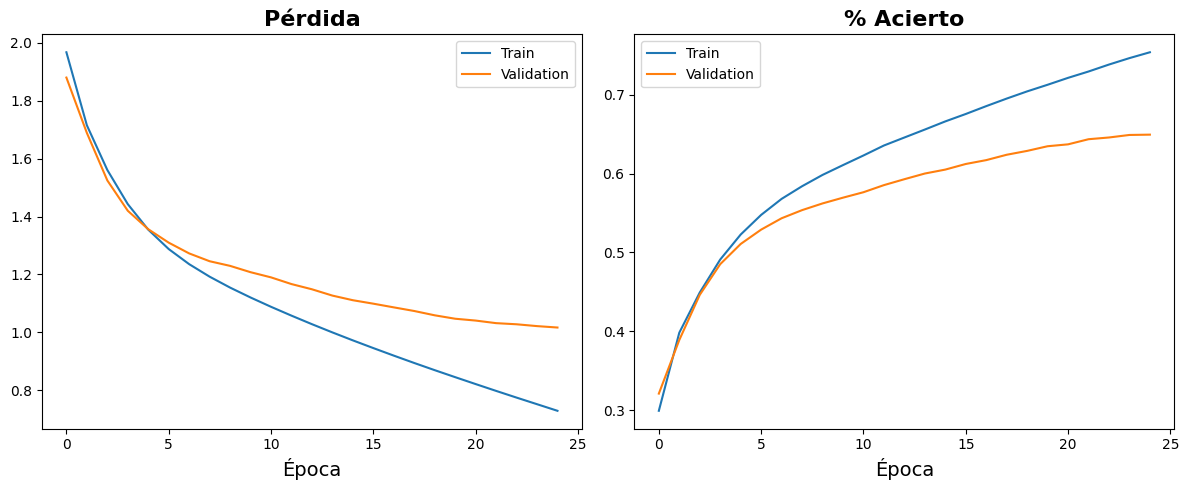

In [ ]:
# Muestra la pérdida y el acierto por cada época

fig, axs = plt.subplots(1, 2, figsize=(12, 5))  # 1 fila, 2 columnas
# Gráfico de pérdida
axs[0].plot(hist.history['loss'], label="Train")
axs[0].plot(hist.history['val_loss'], label="Validation")
axs[0].set_title('Pérdida', fontsize=16, fontweight="bold")
axs[0].set_xlabel('Época', fontsize=14)
axs[0].legend()

# Gráfico de precisión
axs[1].plot(hist.history['accuracy'], label="Train")
axs[1].plot(hist.history['val_accuracy'], label="Validation")
axs[1].set_title('% Acierto', fontsize=16, fontweight="bold")
axs[1].set_xlabel('Época', fontsize=14)
axs[1].legend()

plt.tight_layout()
plt.show()

## Ejercicio: Mejorando el acierto con más capas

La red anterior aunque muy simple, alcanzó un acierto de sobre 60% en unas pocas épocas lo que está muy por encima de la red feed-forward del laboratorio pasado. Lo otro que es fácil notar, si graficaste la pérdida y el acierto, es que la red tiene un sobreajuste (overfitting) considerable,  por lo que sería bueno no solo agregar capas sino también agregar regularización.

Ahora crearás una red convolucional de 3 capas convolucionales y dos capas densas para mejorar la predicción y además agregarás capas de dropout intermedias. Tu red debe tener esta arquitectura

**Convolucional 32 (3x3) -->  Convolucional 32 (3x3) -->  Max Pooling (2x2) --> Convolucional 64 (3x3) --> Max Pooling (2x2) --> Densa 512 -->  Densa 10**

Considera todas las activaciones como `relu`. Si hiciste todo bien, tu red debiera tener alrededor de **1,2M parámetros**. Nota que es bastante menos que para la red anterior incluso cuando la anterior tenía menos capas (¿puedes explicar por qué).

Debes realizar lo siguiente:
- Entrena primero con la arquitectura de arriba sin regularización. Hazlo solo por 30 épocas.
- Imprime la pérdida y el acierto por cada época y nota que mejora el acierto, pero que hay  un alto sobreajuste.
- Posteriormente, agrega algunas capas de dropout, dos o tres con una tasa de dropout moderada (0.2 a 0.3), y entrena otra vez por 40 épocas
- Imprime la pérdida y el acierto por cada época y asegúrate que mejora el acierto y baja el sobre ajuste. Haz los cambios que estimes convenientes para mejorar las métricas.

En el último paso deberías llegar al menos a un 70% de acierto en el conjunto de prueba (si no lo alcanzas, intenta haciendo cambios como hemos aprendido en clases).  Muestra algunos ejemplos de las predicciones de tu red y guarda el modelo para usarlo posteriormente.


### a) Crea la arquitectura

Crea la arquitectura con 3 capas convolucionales y dos densas, imprime el resumen de la red y entrénala por 30 épocas.

In [ ]:
# Acá empieza tu código para crear la red (~10 líneas de código)


# Acá termina tu código

In [ ]:
# Acá tu código para compilar y entrenar la red

# Acá termina tu código.

In [ ]:
# Mostramos la pérdida y el acierto por cada época

### b) Imprime los resultados

Muestra un gráfico con la pérdida y el acierto por época de entrenamiento. El acierto debiera mejorar tanto en el conjunto de entrenamiento como en el de prueba, pero también debiera notarse un sobreajuste considerable.

In [ ]:
# Acá tu código para mostrar pérdida y acierto



# Acá termina tu código

### c) Agrega dropout

Agrega un par (al menos dos) capas de dropout con probabilidad moderada (0.2 a 0.3), reentrena por 30-40 épocas.



In [ ]:
# Acá tu código para la nueva red con dropout

# Acá termina tu código

In [ ]:
# Acá tu código para compilar y entrenar la red
# Acá termina tu codigo

### d) Analiza los resultados y repite si fuera necesario

Imprime las curvas de aprendizaje y asegúrate de que no hay un sobre ajuste considerable y que el acierto en el conjunto de prueba es al menos 70%. Si es necesario, repite la parte (e)  haciendo los cambios que estimes conveniente (como agregar otra capa de dropout o  aumentar la probabilidad de dropout si es que aun hay mucho sobreajuste).

In [ ]:
# Acá tu código para mostrar pérdida y acierto
# Mostramos la pérdida y el acierto por cada época

# Acá termina tu código

### e) Opcional: ejemplos de predicciones

Muestra ejemplos al azar de las predicciones de tu modelo con los ejemplos de prueba.

In [ ]:
# Acá tu código para mostrar algunas predicciones



# Acá termina tu código